The Effects of the Covid-19 Pandemic on Various Life Factors

Here, we will examine a survey taken by a sample of students ranging in age from 13 to 22. Students were asked to rate their overall feelings about stress, family/friend relationships on a scale of 1-6. Students were also asked to report the number of hours spent doing homework before and after the pandemic. We will look for trends based on demographic factors such as age, location, learning environment, etc. We will attempt to determine the most significant affects that the pandemic had on students and propose some potential solutions to help students move forward.

We begin by importing the necessary libraries.

In [162]:
#Imports 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

We load the CSV file containing our survey responses. 

In [163]:
#Load the survey data to the notebook

# Get the path to the "documents" folder
documents_folder = os.path.expanduser('~/Documents')

# Specify the file name
file_name = 'Covid_Responses.csv'

# Construct the full file path
file_path = os.path.join(documents_folder, file_name)

# Load the CSV file into a DataFrame
data = pd.read_csv(file_path)

We want to be as thorough as possible when trying to understand our data. To that end, we some critical factors about our data including the various data types, the number of non-null values (which tells us how many responses we have to each survey question), file size, etc. This next step will also confirm that the correct file is loaded.

In [164]:
#Initial exploration of the data (datatypes, non-null values, etc.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                40 non-null     object 
 1   Country                 40 non-null     object 
 2   State                   28 non-null     object 
 3   Age                     40 non-null     int64  
 4   Gender                  37 non-null     object 
 5   Before-Environment      40 non-null     object 
 6   Before-ClassworkStress  40 non-null     int64  
 7   Before-HomeworkStress   40 non-null     int64  
 8   Before-HomeworkHours    40 non-null     float64
 9   Now-Environment         40 non-null     object 
 10  Now-ClassworkStress     40 non-null     int64  
 11  Now-HomeworkStress      40 non-null     int64  
 12  Now-HomeworkHours       40 non-null     float64
 13  FamilyRelationships     40 non-null     int64  
 14  FriendRelationships     40 non-null     int6

Now, that we have somewhat of an understanding of what is contained in the file, let's get a better visualization of what the file actually looks like.

In [165]:
#Initial exmamination continued
data.head()

,Category,Country,State,Age,Gender,Before-Environment,Before-ClassworkStress,Before-HomeworkStress,Before-HomeworkHours,Now-Environment,Now-ClassworkStress,Now-HomeworkStress,Now-HomeworkHours,FamilyRelationships,FriendRelationships
0,SchoolCollegeTraining,US,TX,14,Male,Physical,1,3,2.0,Virtual,3,5,4.5,2,-1
1,SchoolCollegeTraining,US,MD,13,Male,Physical,5,4,2.0,Virtual,3,5,2.5,1,-2
2,Homeschool,US,TX,16,Female,Virtual,1,3,10.0,Virtual,3,5,15.0,1,-1
3,SchoolCollegeTraining,US,GA,17,Male,Physical,4,4,6.0,Physical,5,1,6.0,0,-2
4,SchoolCollegeTraining,GB,NaN,14,Male,Physical,3,4,4.0,Physical,5,5,6.0,0,1


To "Dig in" a bit further, let's look to see where our missing values lie.

In [166]:
#Looking at the number of missing values
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing = missing.sort_values(by='count', ascending = False)
print(missing)

                        count     %
State                      12  30.0
Gender                      3   7.5
Category                    0   0.0
Country                     0   0.0
Age                         0   0.0
Before-Environment          0   0.0
Before-ClassworkStress      0   0.0
Before-HomeworkStress       0   0.0
Before-HomeworkHours        0   0.0
Now-Environment             0   0.0
Now-ClassworkStress         0   0.0
Now-HomeworkStress          0   0.0
Now-HomeworkHours           0   0.0
FamilyRelationships         0   0.0
FriendRelationships         0   0.0


It appears that the majority of missing values lie in the state column. This is not initially alarming, because, as we saw above in the .head() call, the US was not the only country included in this survey. "GB", or Great Britain, does NOT have states, for example. Let's confirm that any survey respondent outside of the US did NOT answer the survey question. 

In [167]:
# Filter the DataFrame to include only rows where the country is not the US and the state is not null
non_us_state_responses = data[(data['Country'] != 'US') & data['State'].notnull()]

# Display the filtered DataFrame
print(non_us_state_responses)


Empty DataFrame
Columns: [Category, Country, State, Age, Gender, Before-Environment, Before-ClassworkStress, Before-HomeworkStress, Before-HomeworkHours, Now-Environment, Now-ClassworkStress, Now-HomeworkStress, Now-HomeworkHours, FamilyRelationships, FriendRelationships]
Index: []


The Empty DataFrame confirms that anyone who responded to the survey who lives outside of the US did NOT answer the state question. To avoid confusion and to simplify our processes, we will focus solely on data from US respondents only. The vast majority of our respondents are from the US anyway. Thus, by dropping any null values in the data, we can rest assured that no non-US data will be included going forward. 

Let's continue our examination by separating the different datatypes we will be working with. We will begin with our object data types. 

In [168]:
#Examine object types
data.select_dtypes('object')

,Category,Country,State,Gender,Before-Environment,Now-Environment
0,SchoolCollegeTraining,US,TX,Male,Physical,Virtual
1,SchoolCollegeTraining,US,MD,Male,Physical,Virtual
2,Homeschool,US,TX,Female,Virtual,Virtual
3,SchoolCollegeTraining,US,GA,Male,Physical,Physical
4,SchoolCollegeTraining,GB,NaN,Male,Physical,Physical
5,SchoolCollegeTraining,US,WV,Male,Physical,Virtual
6,SchoolCollegeTraining,US,MO,Female,Physical,Virtual
7,SchoolCollegeTraining,US,PA,Male,Physical,Virtual
8,Homeschool,US,IL,Female,Hybrid,Hybrid
9,SchoolCollegeTraining,US,MN,Female,Physical,Virtual


Here, we see any categorical data, or "Nouns", if you will. Now, let's move on to any int64 data types. 

In [169]:
#Examine int64 types
data.select_dtypes('int64')

,Age,Before-ClassworkStress,Before-HomeworkStress,Now-ClassworkStress,Now-HomeworkStress,FamilyRelationships,FriendRelationships
0,14,1,3,3,5,2,-1
1,13,5,4,3,5,1,-2
2,16,1,3,3,5,1,-1
3,17,4,4,5,1,0,-2
4,14,3,4,5,5,0,1
5,17,1,1,5,6,2,-2
6,18,2,3,3,5,-2,-1
7,17,1,3,5,5,0,-3
8,16,3,3,2,4,-3,2
9,15,2,2,1,2,1,-1


As we can see, this includes our any "non-decimal", if you will, numeric data. We see the age of our selected sample of participants as well as the rankings of various life factors. Next, we will look at our float64 data types.

In [170]:
#Examine float64 types
data.select_dtypes('float64')

,Before-HomeworkHours,Now-HomeworkHours
0,2.0,4.5
1,2.0,2.5
2,10.0,15.0
3,6.0,6.0
4,4.0,6.0
5,3.0,14.0
6,3.0,6.0
7,3.0,5.0
8,3.0,1.0
9,1.0,5.0


With our int64 data types, participants would have been confined to a simple ranking of 1-6. With float64 data types, participants can provide more concise answers. As we can see, several participants reported that they spend 4.5, 2.5, or 1.5 hours, respectively. Using int64 data types would have confined them to the exact hour, which would have lead to them having to over or underestimate their answer, thus giving us less reliable data. 

Finally, we will do some preliminary examinations of the relationships between demographics and participant responses. For example, do we notice any relationship between age and family relationships? What about Gender and Friendships? These are just a couple of examples. This final section will involve repeating a number of steps and grouping the data by various categories. A brief discussion/explanation will take place with each category.We will first group the data by Age on the Mean. 

In [171]:
#Group data by age
grouped_data = data.groupby('Age')

# Select only the numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

# Calculate the means of numerical columns for each age group
means = grouped_data[numerical_columns.columns].mean()

#Display the means
means.head()

,Age,Before-ClassworkStress,Before-HomeworkStress,Before-HomeworkHours,Now-ClassworkStress,Now-HomeworkStress,Now-HomeworkHours,FamilyRelationships,FriendRelationships
Age,,,,,,,,,
13,13.0,5.000000,4.000000,2.0,3.000000,5.000000,2.500000,1.000000,-2.000000
14,14.0,2.666667,3.500000,3.5,4.500000,5.000000,5.250000,0.166667,-0.333333
15,15.0,1.900000,2.300000,1.8,3.700000,4.100000,5.000000,0.300000,0.300000
16,16.0,2.666667,3.166667,3.5,3.833333,4.666667,4.000000,0.333333,-0.666667
17,17.0,2.444444,3.444444,3.0,3.555556,4.000000,4.611111,0.000000,-1.444444


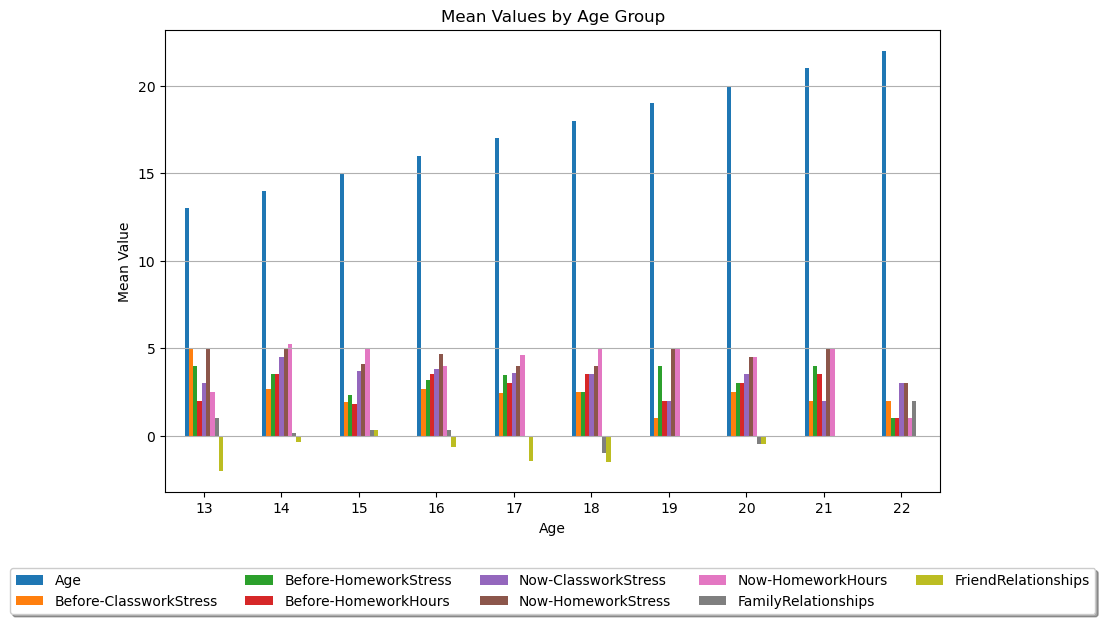

In [172]:
# Plot the means for age
ax = means.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values by Age Group')
plt.xlabel('Age')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)  
plt.grid(axis='y')

# Move the legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)

#Display the plot
plt.show()


Interesting! We can see a few trends here. With every age category, we can see that the number of homework hours increased. Why might this be? If a student went from the physical to virtual environment, was class time reduced? Did Teachers thereby increase the workload on students outside of class time? 

At every age, we also see an increase in classwork stress? Why? If a student moved from physical to virtual environment, were they more afraid to ask a question(s) to better understand the work they were doing? Perhaps they didn't want to "unmute themselves" in front of the whole class. At the same time, even if a student REMAINED in the physical environment, perhaps they were hesitant to approach a Teacher to ask a question due to the fear of getting infected, or of infecting the Teacher. 

The same can said for before and after homework stress. Perhaps students found it more difficult to contact/approach the Teacher during the pandemic for extra help. Perhaps those in the virtual environment historically benefitted from in-person help, but did not feel comfortable with virtual help.

Finally, let's examine the role family/friend relationships. At age 13, participants felt an increase in strength of their family relationships, but a decrease in the strength of their friend relationships. Why? Perhaps a number of them were isolated due to either change of learning environment, and/or level of comfortability with physical contact whether by choice, or by parental decision. Another particularly interesting age group is age 18. One might infer that many (if not all) of our 18 year old participants were Seniors in high school. When we think about Seniors in high school, we think about college applications, the pressure of the milestone that is their last year of high school, and trying to manage the balance between being a "legal adult", if you will, in the US, versus still living under the roof and rules of a parent or guardian. Perhaps the pressure on our 18 year old participants was so great that all of their relationships suffered due to isolation, frustration, some combination of these and/or other factors.

Next, let's examine these same factors, but look at the difference among various genders.

In [173]:
# Group the numerical data by 'Gender'
gender_groups = numerical_data.groupby(data['Gender'])

# Select numerical columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate means for each gender group
gender_means = gender_groups.mean()

# Display the means
gender_means.head()

,Age,Before-ClassworkStress,Before-HomeworkStress,Before-HomeworkHours,Now-ClassworkStress,Now-HomeworkStress,Now-HomeworkHours,FamilyRelationships,FriendRelationships
Gender,,,,,,,,,
Female,15.714286,2.071429,2.785714,3.678571,3.357143,4.285714,5.964286,0.0,-0.428571
Male,15.800000,2.700000,3.100000,2.700000,3.800000,4.100000,4.300000,0.5,-1.000000
Other,15.500000,1.500000,4.000000,2.500000,3.500000,5.000000,4.000000,0.0,-2.500000


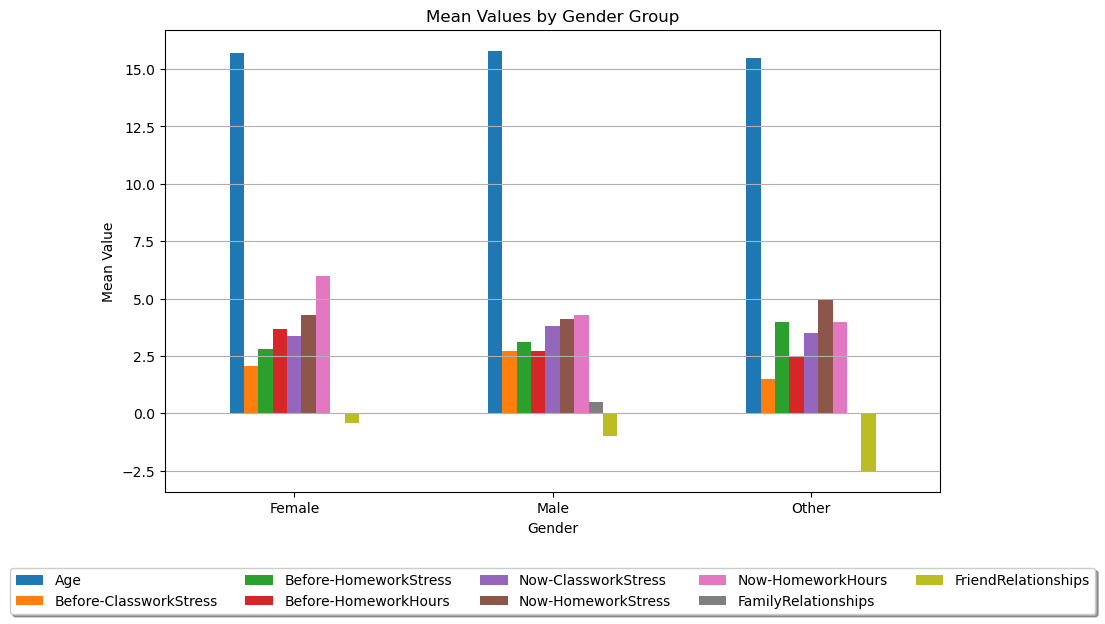

In [174]:
# Plot the means for gender
ax = gender_means.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values by Gender Group')
plt.xlabel('Gender')
plt.ylabel('Mean Value')
plt.xticks(rotation=0) 
plt.grid(axis='y')  

# Move the legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)

plt.show()


Once again, we see an increase in school/class-related stress. However, a very interesting point is that regardless of Gender, on average, friend relationships were stable if not strengthened. Also interesting, our participants who marked there Gender as "other" reported a significant decrease in the strength of their family relationships. While we don't want to go too in-depth on the topic of gender, perhaps our participants of "other" genders feel alienated from their families and if they entered into a virtual learning environment, perhaps they felt the pressure of being in increased company of a family who may not fully accept them. Perhaps school was there escape from this and that was taken away during the pandemic. Let's continue by looking at the life factors as they relate to State.

In [175]:
# Select numerical columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Group the numerical data by 'state'
state_groups = numerical_data.groupby(data['State'])

# Calculate means for each state group
state_means = state_groups.mean()

# Display the means
state_means.head()

,Age,Before-ClassworkStress,Before-HomeworkStress,Before-HomeworkHours,Now-ClassworkStress,Now-HomeworkStress,Now-HomeworkHours,FamilyRelationships,FriendRelationships
State,,,,,,,,,
AZ,19.00,1.00,4.00,2.0,2.00,5.0,5.00,0.0,0.0
CA,17.00,4.00,5.00,5.0,1.00,5.0,2.00,-1.0,-3.0
CO,14.00,5.00,4.00,9.0,6.00,5.0,10.00,-1.0,-3.0
FL,14.75,1.75,2.25,4.0,4.25,5.0,6.75,-0.5,0.5
GA,16.00,3.00,2.50,3.0,5.00,3.0,4.50,1.5,-2.5


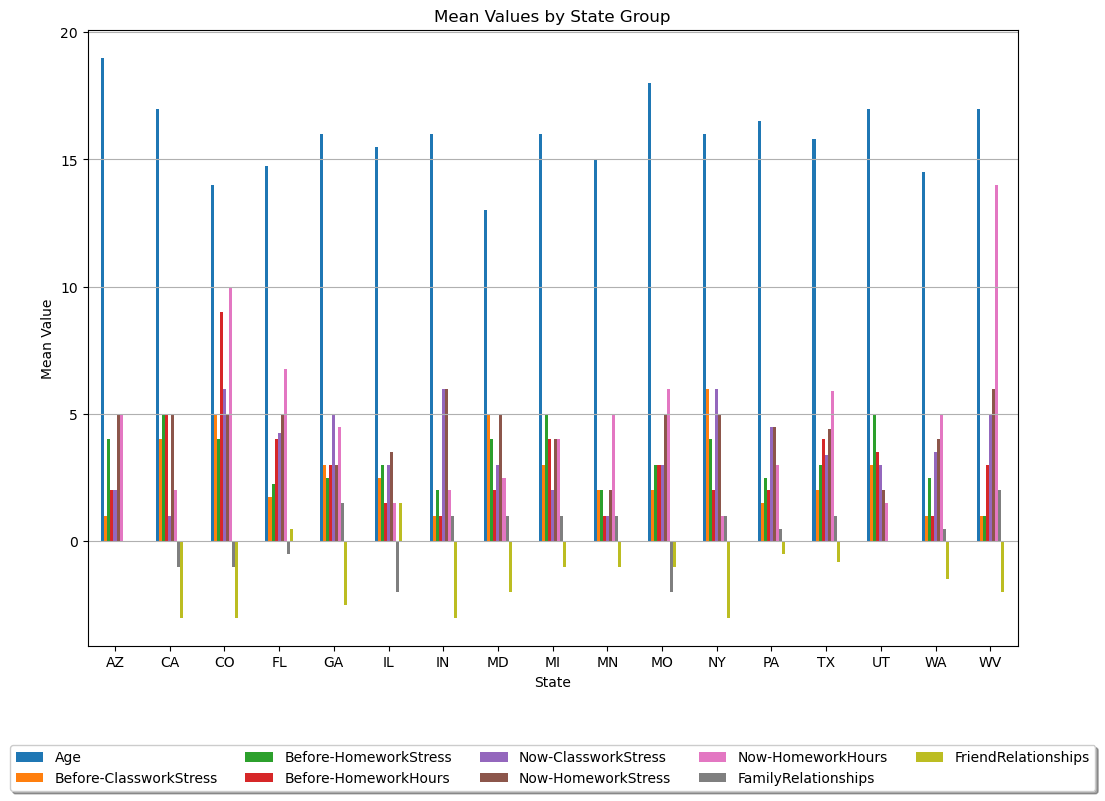

In [176]:
# Plot means using stacked bar graph
ax = state_means.plot(kind='bar', figsize=(12, 8))
plt.title('Mean Values by State Group')
plt.xlabel('State')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Move the legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)

plt.show()


Here, we see a couple of interesting factors. In Colorado and West Virginia, we see a dramatic increase in homework hours after the pandemic. Why is that?

In [177]:
# Count the number of participants from each state
state_counts = data['State'].value_counts()

# Print the result
print(state_counts)


State
TX    5
FL    4
GA    2
PA    2
IL    2
WA    2
WV    1
MO    1
MN    1
MD    1
CO    1
UT    1
MI    1
CA    1
IN    1
AZ    1
NY    1
Name: count, dtype: int64


As I suspected, Colorado, West Virginia, and several others only had one participant from each of them. This leads me to believe that state may not be the best demographic factor for us to focus on. But what if we combined some of the states and broke the country up by region?

In [178]:
# Define a dictionary mapping states to regions
state_region_mapping = {
    'TX': 'South',
    'MD': 'Northeast',
    'GA': 'South',
    'WV': 'South',
    'MO': 'Midwest',
    'PA': 'Northeast',
    'IL': 'Midwest',
    'MN': 'Midwest',
    'FL': 'South',
    'CO': 'West',
    'WA': 'West',
    'UT': 'West',
    'MI': 'Midwest',
    'CA': 'West',
    'AZ': 'West'
}

# Add a new column 'Region' based on the mapping
data['Region'] = data['State'].map(state_region_mapping)

# Display the DataFrame with the 'Region' column
data.head()

,Category,Country,State,Age,Gender,Before-Environment,Before-ClassworkStress,Before-HomeworkStress,Before-HomeworkHours,Now-Environment,Now-ClassworkStress,Now-HomeworkStress,Now-HomeworkHours,FamilyRelationships,FriendRelationships,Region
0,SchoolCollegeTraining,US,TX,14,Male,Physical,1,3,2.0,Virtual,3,5,4.5,2,-1,South
1,SchoolCollegeTraining,US,MD,13,Male,Physical,5,4,2.0,Virtual,3,5,2.5,1,-2,Northeast
2,Homeschool,US,TX,16,Female,Virtual,1,3,10.0,Virtual,3,5,15.0,1,-1,South
3,SchoolCollegeTraining,US,GA,17,Male,Physical,4,4,6.0,Physical,5,1,6.0,0,-2,South
4,SchoolCollegeTraining,GB,NaN,14,Male,Physical,3,4,4.0,Physical,5,5,6.0,0,1,NaN


In [179]:
# Select numerical columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Group the numerical data by 'Region'
region_groups = numerical_data.groupby(data['Region'])

# Calculate means for each Region group
region_means = region_groups.mean()

# Display the means
region_means.head()

,Age,Before-ClassworkStress,Before-HomeworkStress,Before-HomeworkHours,Now-ClassworkStress,Now-HomeworkStress,Now-HomeworkHours,FamilyRelationships,FriendRelationships
Region,,,,,,,,,
Midwest,16.000000,2.400000,3.200000,2.200000,2.400000,3.600000,3.600000,-0.800000,0.00
Northeast,15.333333,2.666667,3.000000,2.000000,4.000000,4.666667,2.833333,0.666667,-1.00
South,15.583333,2.000000,2.500000,3.750000,4.083333,4.500000,6.625000,0.666667,-0.75
West,16.000000,2.500000,3.833333,3.583333,3.166667,4.166667,4.750000,-0.166667,-1.50


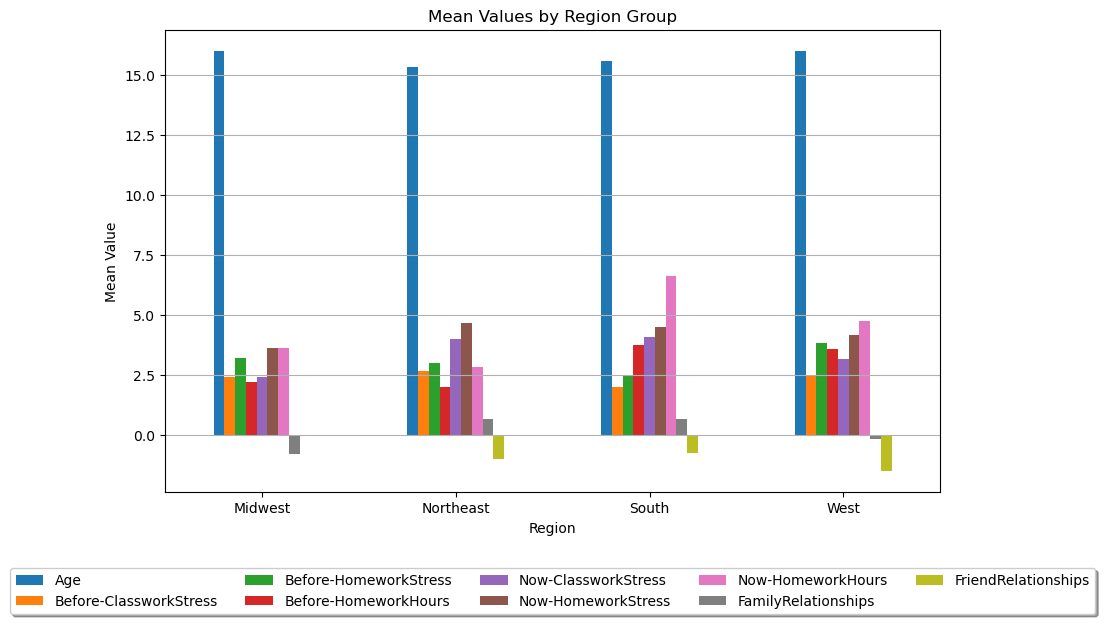

In [180]:
# Plot the means for Region
ax = region_means.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values by Region Group')
plt.xlabel('Region')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines along y-axis

# Move the legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)

plt.show()


Some things to note: Only in the Northeast, South, and West did we see a decrease in the strength of friend relationships. Why might this be the case? Certainly, the intention/purpose here is not to is not to engage in any sort of political discussion or to take a political stance. However, is this something that could be worth considering? In some of these states, could this have had to do with the perception of the severity of the pandemic in conjunction with the level of comfort that parents/guardians had with allowing our minor students go out with their friends? Of course, our adult students may well have had the liberty to make those decisions for themselves. Depending on the state, perhaps in the midwest at least some of those states may not be as densely populated as in the West or the South in particular. Thus, people may have felt safer to be out of their homes and around other people. 

In the Northeast and South, we saw a significant increase in the strength of family relationships. For the South, perhaps we could speculate that better weather, being near the coast (ocean) allowed for more periods of outdoor activities and the ability to spread people apart.Perhaps perceptions of the pandemic also played a role in this as well.

Another interesting thing to note: The Southern region of the US saw the most dramatic increase in number of homework hours? We may need more information to better understand why that might be. Did these states witness a dramatic drop in overall student performance during the pandemic and are attempting to restore the performance levels through more individual practice? 

Finally, let's group our data by the type of learning environment both before and after the pandemic and examine how this may have impacted our life factors.

In [181]:
# Select numerical columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Group the numerical data by 'Before-Environment'
before_env_groups = numerical_data.groupby(data['Before-Environment'])

# Calculate means for each before_env group
before_env_means = before_env_groups.mean()

# Display the means
before_env_means.head()

,Age,Before-ClassworkStress,Before-HomeworkStress,Before-HomeworkHours,Now-ClassworkStress,Now-HomeworkStress,Now-HomeworkHours,FamilyRelationships,FriendRelationships
Before-Environment,,,,,,,,,
Hybrid,17.666667,2.333333,3.000000,3.000000,2.666667,4.000000,3.333333,-1.000000,0.000000
Physical,16.176471,2.470588,3.176471,2.617647,3.705882,4.382353,4.514706,0.176471,-0.676471
Virtual,17.333333,1.333333,1.666667,4.666667,3.666667,4.666667,7.000000,1.000000,0.333333


In [182]:
# Select numerical columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Group the numerical data by 'Now-Environment'
now_env_groups = numerical_data.groupby(data['Now-Environment'])

# Calculate means for each now_env group
now_env_means = now_env_groups.mean()

# Display the means
now_env_means.head()

,Age,Before-ClassworkStress,Before-HomeworkStress,Before-HomeworkHours,Now-ClassworkStress,Now-HomeworkStress,Now-HomeworkHours,FamilyRelationships,FriendRelationships
Now-Environment,,,,,,,,,
Hybrid,15.714286,2.428571,2.714286,1.214286,3.857143,4.714286,3.142857,-0.571429,0.428571
Physical,15.800000,3.800000,4.200000,3.500000,4.800000,3.400000,3.500000,0.400000,-0.400000
Virtual,16.642857,2.107143,2.928571,3.071429,3.357143,4.464286,5.178571,0.285714,-0.821429


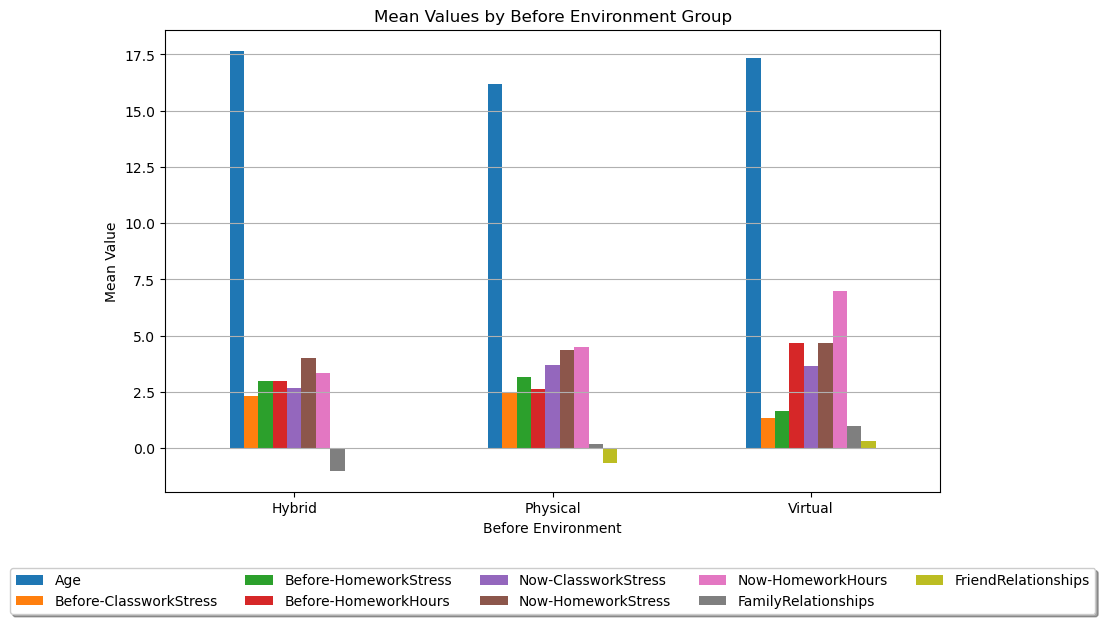

In [183]:
# Plot the means for before_env
ax = before_env_means.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values by Before Environment Group')
plt.xlabel('Before Environment')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines along y-axis

# Move the legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)

plt.show()


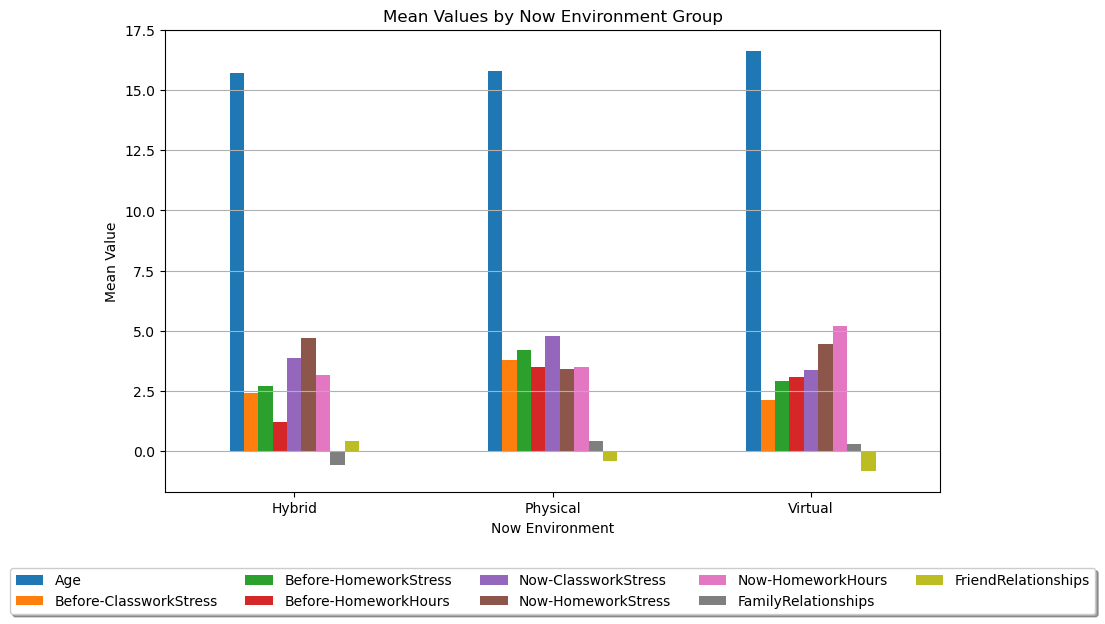

In [184]:
# Plot the means for now_env
ax = now_env_means.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values by Now Environment Group')
plt.xlabel('Now Environment')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines along y-axis

# Move the legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)

plt.show()


Interesting! Note that students who where in the Physical environment BEFORE the pandemic reported a Classwork Stress level of 2.38, while students who were in the physical environment DURING the pandemic reported a Classwork Stress level of 3.5. Perhaps students in the physical environment DURING the pandemic were not there by personal choice, but rather their school district did not offer them another option and they may not have felt entirely comfortable in that environment. Similarly, note the increase of Classwork stress from students in the VIRTUAL environment both before and during the pandemic. Most likely, student in the virtual environment BEFORE the pandemic were there by choice and were therefore used to navigating that type of learning environment. Whereas, students who were in the virtual environment DURING the pandemic were likely NOT there by choice. They may have felt lost, lonely, or may have succumbed to the ease of getting up and walking away from the computer while your Teacher is in the middle of a live lecture and therefore did not know HOW to complete their classwork!

Initial thoughts and conclusion of the Data Wrangling portion: It is clear from this initial exploration that the pandemic affected students in a number of different ways. Having completed this initial exploration, it seems that the most significant demographics that played a role in the affects of the pandemic are age, gender, and learning environment. Based on the number of participants from each state, it does not appear that we have enough data from individual states to infer that state played a significant role in the affects. In the exploratory Data Analysis phase, we will continue to focus on Age, Gender, and Learning environments to help us determine the appropriate interventions to help our students to recover academically, socially, and emotionally from the affects of the pandemic. 